### Overview of the data

In [12]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
conn = sqlite3.connect('factbook.db')
q = "SELECT * FROM sqlite_master WHERE type='table';"

pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [4]:
pd.read_sql_query('SELECT * FROM facts LIMIT 5',conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [7]:
pd.read_sql_query("SELECT MIN(population),\
                            MAX(population),\
                          MIN(population_growth),\
                          MAX(population_growth)\
                          FROM facts"
,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [8]:
pd.read_sql_query("SELECT name FROM facts WHERE population = 0;",conn)

,name
0,Antarctica


In [11]:
pd.read_sql_query("SELECT name FROM facts WHERE population = (SELECT MAX(population) FROM facts) ;",conn)

,name
0,World


C:\Users\Dan\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3326: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019132C29780>,
      dtype=object)

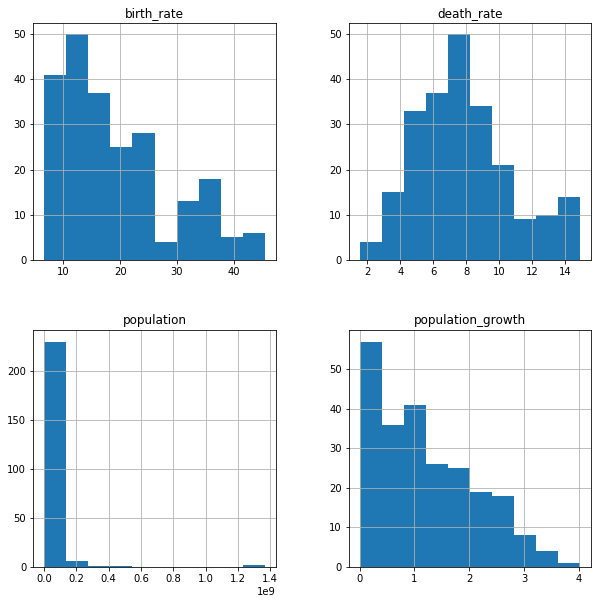

In [14]:
fig = plt.figure(figsize=(10,10))
ax =fig.add_subplot(111)
pd.read_sql_query("SELECT population, population_growth, birth_rate, death_rate FROM facts\
                   WHERE population <> (SELECT MIN(population) FROM facts) AND population <> (SELECT MAX(population) FROM facts);",conn).hist(ax=ax)